In [47]:
import pandas as pd

import matplotlib.pyplot as plt

csv_file_path =r'C:\Users\Mayas\Documents\Datamatiker\4 semester\Business Intelligence\MP1\coal.csv'

excel_file_path = r'C:\Users\Mayas\Documents\Datamatiker\4 semester\Business Intelligence\MP1\coal_final_result.xlsx'

df = pd.read_csv(csv_file_path)

df.to_excel(excel_file_path, index=False)

print(f"Excel file has been saved to: {excel_file_path}")


Excel file has been saved to: C:\Users\Mayas\Documents\Datamatiker\4 semester\Business Intelligence\MP1\coal_final_result.xlsx


In [48]:
df.head()

,Country or Area,Year,Unit,Value,Value Footnotes
0,Afghanistan,2016,Thousand metric tons,1698.19,1.0
1,Afghanistan,2015,Thousand metric tons,1364.80,1.0
2,Afghanistan,2014,Thousand metric tons,1517.40,1.0
3,Albania,2015,Thousand metric tons,99.00,NaN
4,Argentina,2016,Thousand metric tons,23.00,NaN


In [49]:
print(df)

    Country or Area                                             Year  \
0       Afghanistan                                             2016   
1       Afghanistan                                             2015   
2       Afghanistan                                             2014   
3           Albania                                             2015   
4         Argentina                                             2016   
..              ...                                              ...   
161               2     Twelve months ending 30 June of year stated.   
162               3  Twelve months beginning 1 April of year stated.   
163               4   Twelve months beginning 1 July of year stated.   
164               5                 Provisional or estimated figure.   
165               6                   Including Jersey and Guernsey.   

                     Unit    Value  Value Footnotes  
0    Thousand metric tons  1698.19              1.0  
1    Thousand metric tons  

Top Ten Largest producers of Hard Coal between 2016-2014

In [50]:
highest_value_in_column = df['Value'].max()


In [51]:
print(highest_value_in_column)

3873919.0


In [53]:
sorted_df = df.sort_values(by='Value', ascending=False)

# Extract the top 10 rows
top_10 = sorted_df.head(10)

# If you want just the list of countries in the top 10
top_10_countries = top_10['Country or Area'].tolist()

print(top_10_countries)

['China', 'China', 'China', 'India', 'India', 'India', 'Indonesia', 'Indonesia', 'United States of America', 'Indonesia']


Grouping all countries and adding their values to get the total production for each country



In [54]:
total_production = df.groupby('Country or Area')['Value'].sum().reset_index()

print(total_production)


                       Country or Area      Value
0                                    1       0.00
1                                    2       0.00
2                                    3       0.00
3                                    4       0.00
4                                    5       0.00
..                                 ...        ...
57  Venezuela (Bolivarian Republic of)    2779.00
58                            Viet Nam  121277.00
59                              Zambia     646.00
60                            Zimbabwe   11798.42
61                             fnSeqID       0.00

[62 rows x 2 columns]


Top ten producers of hard coal

In [55]:
top_ten_highest = total_production.nlargest(10, 'Value')

print(top_ten_highest)


             Country or Area       Value
17                     China  11031065.0
24                     India   1911202.0
25                 Indonesia   1319023.0
9                  Australia   1244520.0
55  United States of America   1096747.0
47        Russian Federation    837025.0
48              South Africa    771274.0
29                Kazakhstan    306208.0
18                  Colombia    264638.0
45                    Poland    215101.0


In [56]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

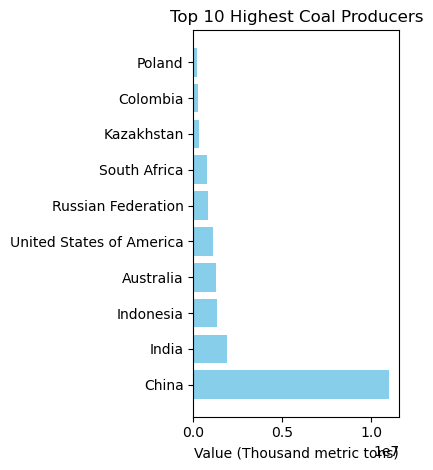

In [57]:
# Making a horizontal bar graph to show the top ten producers of hard coal.

plt.subplot(1, 2, 1)
plt.barh(top_ten_highest['Country or Area'], top_ten_highest['Value'], color='skyblue')
plt.xlabel('Value (Thousand metric tons)')
plt.title('Top 10 Highest Coal Producers')
plt.tight_layout()


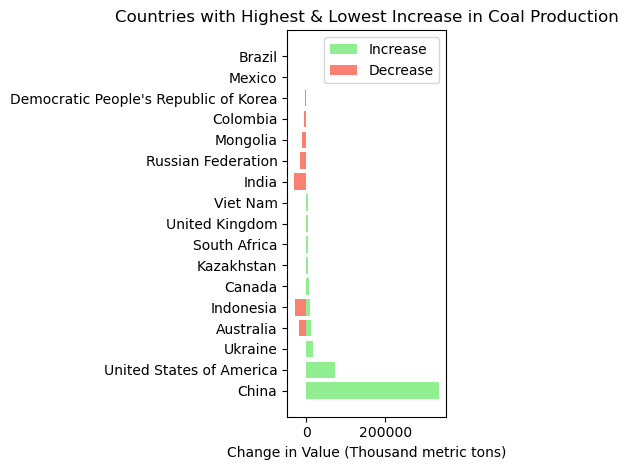

In [58]:
# Making a bar graph that shows the highest and lowest increase in hard Coal production 


df['Previous Year Value'] = df.groupby('Country or Area')['Value'].shift(1)
df['Change'] = df['Value'] - df['Previous Year Value']

# Filter out rows without a previous year value to ensure we only consider valid year-to-year changes
valid_changes = df.dropna(subset=['Change'])

# Group by country to get the maximum increase and maximum decrease
max_increase = valid_changes.groupby('Country or Area')['Change'].max().reset_index()
max_decrease = valid_changes.groupby('Country or Area')['Change'].min().reset_index()

# Sorting to find the countries with the biggest increase and decrease in coal consumption
highest_increase = max_increase.nlargest(10, 'Change')
highest_decrease = max_decrease.nsmallest(10, 'Change')

# Plot for the countries with the highest and lowest increase in value
plt.subplot(1, 2, 2)
plt.barh(highest_increase['Country or Area'], highest_increase['Change'], color='lightgreen', label='Increase')
plt.barh(highest_decrease['Country or Area'], highest_decrease['Change'], color='salmon', label='Decrease')
plt.xlabel('Change in Value (Thousand metric tons)')
plt.title('Countries with Highest & Lowest Increase in Coal Production')
plt.legend()

plt.tight_layout()
plt.show()